# Tamil Semantic Textual Similarity

In [13]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
language = "Tamil"
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [16]:
train['similarity'] = train['manual_similarity'].apply(lambda x: x*5)
test['similarity'] = test['manual_similarity'].apply(lambda x: x*5)

train["id"] = train.index + 1
test["id"] = test.index + 1

Let's see what are the rows in train and test datasets

In [17]:
train[:10]

,ID,sentence_1,sentence_2,manual_similarity,similarity,id
0,1,பலகையில் ஒருவர் சைக்கிள் சாகசம் புரிகிறார்,சைக்கிளில் ஒரு நபர் தாண்டி குதிக்கிறார்,0.60,3.00,1
1,2,பலகையில் ஒருவர் சைக்கிள் சாகசம் புரிகிறார்,ஒருவர் ஈருருளியில் பயணிக்கின்றார்,0.60,3.00,2
2,3,பலகையில் ஒருவர் சைக்கிள் சாகசம் புரிகிறார்,ஒருவர் சறுக்கீசில் துவிச்சக்கர வண்டியை மேல் நோ...,0.40,2.00,3
3,4,பலகையில் ஒருவர் சைக்கிள் சாகசம் புரிகிறார்,சிறிய மரப்பலகை ஊடாக ஈருருளியை செலுத்துகின்றார்,0.60,3.00,4
4,5,பலகையில் ஒருவர் சைக்கிள் சாகசம் புரிகிறார்,பலகையில் துவிச்சக்கரவண்டியை செலுத்துகிறார்.,1.00,5.00,5
5,6,பலகையில் ஒருவர் சைக்கிள் சாகசம் புரிகிறார்,பையன் ஒருவன் அந்தரத்தில் மிதி வண்டி ஓடுகின்றான்,0.20,1.00,6
6,7,பலகையில் ஒருவர் சைக்கிள் சாகசம் புரிகிறார்,துவிச்சக்கரவண்டி பெருந்தெருவில் இருந்து சாய்தள...,0.53,2.65,7
7,8,பலகையில் ஒருவர் சைக்கிள் சாகசம் புரிகிறார்,இது ஒரு மாயையான புகைப்படம்.,0.00,0.00,8
8,9,சைக்கிளில் ஒரு நபர் தாண்டி குதிக்கிறார்,ஒருவர் ஈருருளியில் பயணிக்கின்றார்,0.33,1.65,9
9,10,சைக்கிளில் ஒரு நபர் தாண்டி குதிக்கிறார்,ஒருவர் சறுக்கீசில் துவிச்சக்கர வண்டியை மேல் நோ...,0.33,1.65,10


In [18]:
train.describe()

,ID,manual_similarity,similarity,id
count,2500.00000,2500.000000,2500.000000,2500.00000
mean,1250.50000,0.522412,2.612060,1250.50000
std,721.83216,0.310729,1.553647,721.83216
min,1.00000,0.000000,0.000000,1.00000
25%,625.75000,0.270000,1.350000,625.75000
50%,1250.50000,0.600000,3.000000,1250.50000
75%,1875.25000,0.800000,4.000000,1875.25000
max,2500.00000,1.000000,5.000000,2500.00000


In [19]:
test[:10]

,ID,sentence_1,sentence_2,manual_similarity,similarity,id
0,1,ஓட்டப்பந்தயக்கார்கள் இரண்டு விபத்துக்குள்ளாகிய...,கார் பந்தயத்தில் ஒரு போட்டியாளர் கீழே விழுகிறார்,0.40,2.00,1
1,2,போட்டியின்போது விபத்து நடந்துள்ளது,காரோட்டப்பந்தயமொன்றில் வீரரொருவர் வீழ்கின்றார்.,0.27,1.35,2
2,3,போட்டியின்போது விபத்து நடந்துள்ளது,விளையாட்டு வீரர்கள் விளையாட்டில் மும்முரமாக ஈட...,0.00,0.00,3
3,4,போட்டியின்போது விபத்து நடந்துள்ளது,கார் பந்தயத்தில் ஒரு போட்டியாளர் கீழே விழுகிறார்,0.20,1.00,4
4,5,காரோட்டப்பந்தயமொன்றில் வீரரொருவர் வீழ்கின்றார்.,விளையாட்டு வீரர்கள் விளையாட்டில் மும்முரமாக ஈட...,0.00,0.00,5
5,6,காரோட்டப்பந்தயமொன்றில் வீரரொருவர் வீழ்கின்றார்.,கார் பந்தயத்தில் ஒரு போட்டியாளர் கீழே விழுகிறார்,1.00,5.00,6
6,7,விளையாட்டு வீரர்கள் விளையாட்டில் மும்முரமாக ஈட...,கார் பந்தயத்தில் ஒரு போட்டியாளர் கீழே விழுகிறார்,0.00,0.00,7
7,8,பனிச்சறுக்கு வீரரொருவர் பனிச்சறுக்கில் ஈடுபடுக...,பனிச்சறுக்கலில் வீரர் சாகசம் செய்கிறார்,0.80,4.00,8
8,9,பனிச்சறுக்கு வீரரொருவர் பனிச்சறுக்கில் ஈடுபடுக...,ஒருவர் பனிமலையில் சறுக்குகின்றார்.,0.67,3.35,9
9,10,பனிச்சறுக்கு வீரரொருவர் பனிச்சறுக்கில் ஈடுபடுக...,பனி சறுக்கல் வீரர் பறந்து சாகசம் காட்டுகின்றார்.,0.47,2.35,10


In [20]:
def convert(row):
    if row['similarity'] <= 1.0:
        return '0-1'
    elif 1.0 < row['similarity'] <= 2.0:
        return '1-2'
    elif 2.0 < row['similarity'] <= 3.0:
        return '2-3'
    elif 3.0 < row['similarity'] <= 4.0:
        return '3-4'
    else:
        return '4-5'

train['category'] = train.apply(convert, axis=1)
test['category'] = test.apply(convert, axis=1)

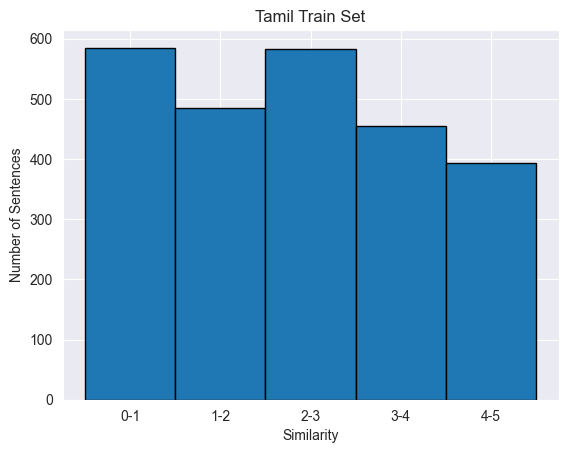

In [21]:
train.groupby("category")['id'].count().plot.bar(width=1,edgecolor = "black",xlabel="Similarity", ylabel="Number of Sentences", rot=0)
plt.title(language + " Train Set")
plt.show()

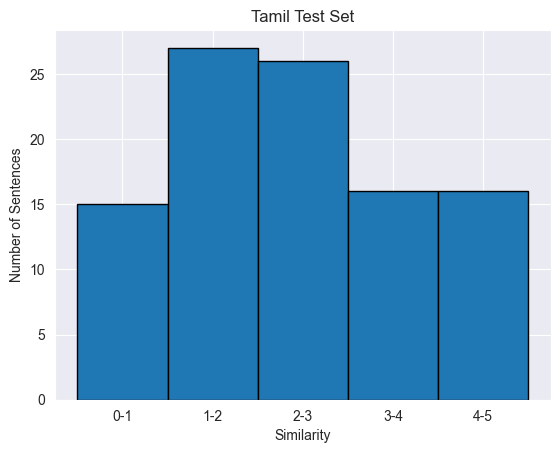

In [22]:
test.groupby("category")['id'].count().plot.bar(width=1,edgecolor = "black",xlabel="Similarity", ylabel="Number of Sentences", rot=0)
plt.title(language + " Test Set")
plt.show()

In [23]:
def normalized_word_Common(row, column_1, column_2):
    w1 = set(map(lambda word: word.lower().strip(), str(row[column_1]).split()))
    w2 = set(map(lambda word: word.lower().strip(), str(row[column_2]).split()))
    return 1.0* len(w1 & w2)

def normalized_word_Total(row, column_1, column_2):
    w1 = set(map(lambda word: word.lower().strip(), str(row[column_1]).split()))
    w2 = set(map(lambda word: word.lower().strip(), str(row[column_2]).split()))
    return 1* (len(w1) + len(w2))

def normalized_word_share(row, column_1, column_2):
    w1 = set(map(lambda word: word.lower().strip(), str(row[column_1]).split()))
    w2 = set(map(lambda word: word.lower().strip(), str(row[column_2]).split()))
    return 1.0*len(w1 & w2) / (len(w1) + len(w2))

def prepare_frequencies(df, id_column, column_1, column_2):
    df['freq_1'] = df.groupby(id_column)[id_column].transform('count')
    df['freq_2'] = df.groupby(id_column)[id_column].transform('count')
    df['s1len'] = df[column_1].str.len()
    df['s2len'] = df[column_2].str.len()
    df['s1_n_words'] = df[column_1].apply(lambda row :len(str(row).split(" ")))
    df['s2_n_words'] = df[column_2].apply(lambda row :len(str(row).split(" ")))

    df['word_Common'] = df.apply(normalized_word_Common, args=(column_1,column_2), axis=1)
    df['word_Total'] = df.apply(normalized_word_Total, args=(column_1,column_2), axis = 1)
    df['word_share'] = df.apply(normalized_word_share, args=(column_1,column_2), axis = 1)

    df['freq_s1+s2'] = df['freq_1'] + df['freq_2']
    df['freq_s1-s2'] = abs(df['freq_1'] - df['freq_2'])

    return df


In [24]:
train = prepare_frequencies(train, "id", "sentence_1", "sentence_2")
test = prepare_frequencies(test, "id", "sentence_1", "sentence_2")

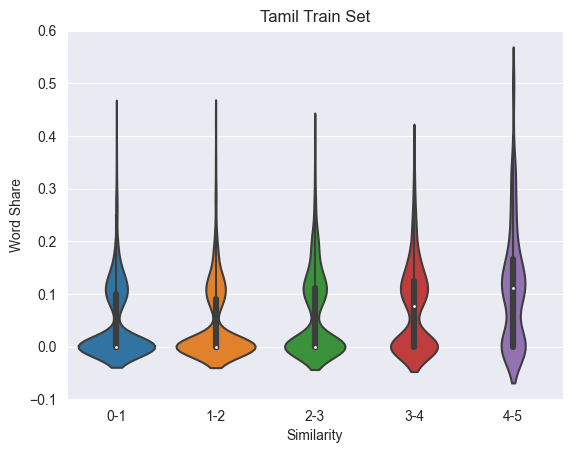

In [25]:
ax = sns.violinplot(x = 'category', y='word_share', data = train[0:], order=[ "0-1", "1-2", "2-3", "3-4", "4-5"])
ax.set_title(language + " Train Set")
ax.set_xlabel('Similarity')
ax.set_ylabel('Word Share')
plt.show()

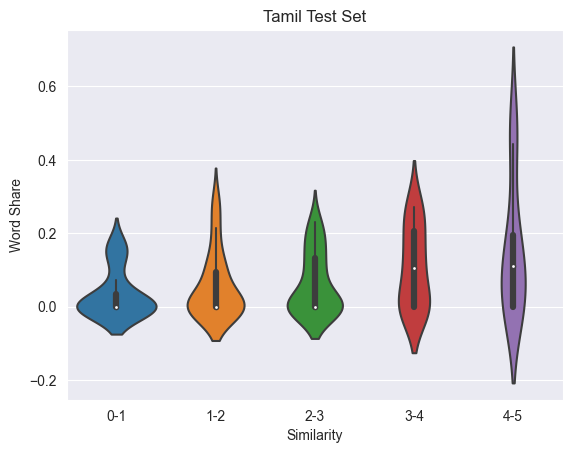

In [26]:
ax = sns.violinplot(x = 'category', y='word_share', data = test[0:], order=[ "0-1", "1-2", "2-3", "3-4", "4-5"])
ax.set_title(language + " Test Set")
ax.set_xlabel('Similarity')
ax.set_ylabel('Word Share')
plt.show()

In [27]:
train[:10]

,ID,sentence_1,sentence_2,manual_similarity,similarity,id,category,freq_1,freq_2,s1len,s2len,s1_n_words,s2_n_words,word_Common,word_Total,word_share,freq_s1+s2,freq_s1-s2
0,1,பலகையில் ஒருவர் சைக்கிள் சாகசம் புரிகிறார்,சைக்கிளில் ஒரு நபர் தாண்டி குதிக்கிறார்,0.60,3.00,1,2-3,1,1,42,39,5,5,0.0,10,0.000000,2,0
1,2,பலகையில் ஒருவர் சைக்கிள் சாகசம் புரிகிறார்,ஒருவர் ஈருருளியில் பயணிக்கின்றார்,0.60,3.00,2,2-3,1,1,42,33,5,3,1.0,8,0.125000,2,0
2,3,பலகையில் ஒருவர் சைக்கிள் சாகசம் புரிகிறார்,ஒருவர் சறுக்கீசில் துவிச்சக்கர வண்டியை மேல் நோ...,0.40,2.00,3,1-2,1,1,42,69,5,7,1.0,12,0.083333,2,0
3,4,பலகையில் ஒருவர் சைக்கிள் சாகசம் புரிகிறார்,சிறிய மரப்பலகை ஊடாக ஈருருளியை செலுத்துகின்றார்,0.60,3.00,4,2-3,1,1,42,46,5,5,0.0,10,0.000000,2,0
4,5,பலகையில் ஒருவர் சைக்கிள் சாகசம் புரிகிறார்,பலகையில் துவிச்சக்கரவண்டியை செலுத்துகிறார்.,1.00,5.00,5,4-5,1,1,42,43,5,3,1.0,8,0.125000,2,0
5,6,பலகையில் ஒருவர் சைக்கிள் சாகசம் புரிகிறார்,பையன் ஒருவன் அந்தரத்தில் மிதி வண்டி ஓடுகின்றான்,0.20,1.00,6,0-1,1,1,42,47,5,6,0.0,11,0.000000,2,0
6,7,பலகையில் ஒருவர் சைக்கிள் சாகசம் புரிகிறார்,துவிச்சக்கரவண்டி பெருந்தெருவில் இருந்து சாய்தள...,0.53,2.65,7,2-3,1,1,42,64,5,5,0.0,10,0.000000,2,0
7,8,பலகையில் ஒருவர் சைக்கிள் சாகசம் புரிகிறார்,இது ஒரு மாயையான புகைப்படம்.,0.00,0.00,8,0-1,1,1,42,27,5,4,0.0,9,0.000000,2,0
8,9,சைக்கிளில் ஒரு நபர் தாண்டி குதிக்கிறார்,ஒருவர் ஈருருளியில் பயணிக்கின்றார்,0.33,1.65,9,1-2,1,1,39,33,5,3,0.0,8,0.000000,2,0
9,10,சைக்கிளில் ஒரு நபர் தாண்டி குதிக்கிறார்,ஒருவர் சறுக்கீசில் துவிச்சக்கர வண்டியை மேல் நோ...,0.33,1.65,10,1-2,1,1,39,69,5,7,0.0,12,0.000000,2,0


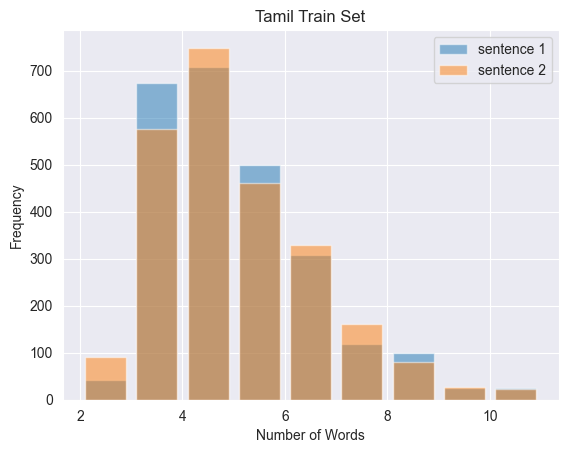

In [28]:
bin_edges = range(min(train['s1_n_words']), max(train['s1_n_words']) + 2, 1)
plt.hist(train['s1_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 1")
plt.hist(train['s2_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 2")
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title(language + " Train Set")
plt.legend()
plt.show()

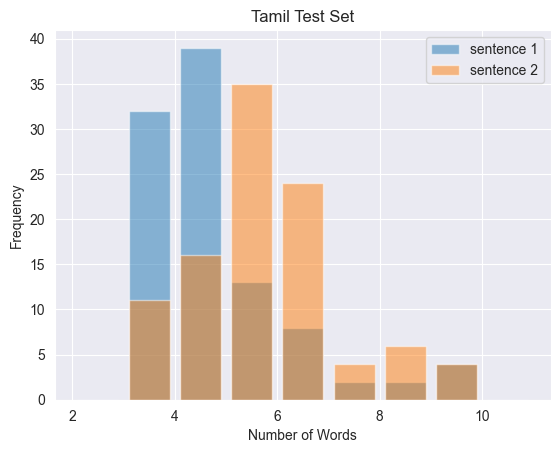

In [29]:
bin_edges = range(min(train['s1_n_words']), max(train['s1_n_words']) + 2, 1)
plt.hist(test['s1_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 1")
plt.hist(test['s2_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 2")
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title(language + " Test Set")
plt.legend()
plt.show()

In [30]:
train.describe()

,ID,manual_similarity,similarity,id,freq_1,freq_2,s1len,s2len,s1_n_words,s2_n_words,word_Common,word_Total,word_share,freq_s1+s2,freq_s1-s2
count,2500.00000,2500.000000,2500.000000,2500.00000,2500.0,2500.0,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.0,2500.0
mean,1250.50000,0.522412,2.612060,1250.50000,1.0,1.0,42.275200,41.88640,4.552400,4.579200,0.569600,9.088400,0.063845,2.0,0.0
std,721.83216,0.310729,1.553647,721.83216,0.0,0.0,13.316065,13.11768,1.545901,1.568155,0.752982,2.212904,0.085408,0.0,0.0
min,1.00000,0.000000,0.000000,1.00000,1.0,1.0,20.000000,20.00000,2.000000,2.000000,0.000000,4.000000,0.000000,2.0,0.0
25%,625.75000,0.270000,1.350000,625.75000,1.0,1.0,33.000000,32.00000,3.000000,3.000000,0.000000,7.000000,0.000000,2.0,0.0
50%,1250.50000,0.600000,3.000000,1250.50000,1.0,1.0,40.000000,40.00000,4.000000,4.000000,0.000000,9.000000,0.000000,2.0,0.0
75%,1875.25000,0.800000,4.000000,1875.25000,1.0,1.0,48.000000,48.00000,5.000000,5.000000,1.000000,10.000000,0.111111,2.0,0.0
max,2500.00000,1.000000,5.000000,2500.00000,1.0,1.0,109.000000,109.00000,10.000000,10.000000,7.000000,19.000000,0.500000,2.0,0.0


In [31]:
test.describe()

,ID,manual_similarity,similarity,id,freq_1,freq_2,s1len,s2len,s1_n_words,s2_n_words,word_Common,word_Total,word_share,freq_s1+s2,freq_s1-s2
count,100.000000,100.000000,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0
mean,50.500000,0.515900,2.579500,50.500000,1.0,1.0,47.590000,49.970000,4.310000,5.280000,0.800000,9.450000,0.079070,2.0,0.0
std,29.011492,0.279878,1.399388,29.011492,0.0,0.0,11.670644,10.511615,1.481843,1.456993,1.145919,1.898298,0.112791,0.0,0.0
min,1.000000,0.000000,0.000000,1.000000,1.0,1.0,32.000000,32.000000,3.000000,3.000000,0.000000,6.000000,0.000000,2.0,0.0
25%,25.750000,0.330000,1.650000,25.750000,1.0,1.0,39.000000,44.000000,3.000000,4.000000,0.000000,8.000000,0.000000,2.0,0.0
50%,50.500000,0.470000,2.350000,50.500000,1.0,1.0,45.000000,48.000000,4.000000,5.000000,0.000000,9.000000,0.000000,2.0,0.0
75%,75.250000,0.730000,3.650000,75.250000,1.0,1.0,54.250000,57.000000,5.000000,6.000000,1.000000,11.000000,0.142857,2.0,0.0
max,100.000000,1.000000,5.000000,100.000000,1.0,1.0,83.000000,72.000000,9.000000,9.000000,6.000000,14.000000,0.500000,2.0,0.0
